# 자연어 처리 시작하기
설치 목록
JDK (Java SE Downloads)
JAVA_HOME 설정
JPype 설치
KoNLPy 설치
Word Cloud 설치

## 8-1. 한글 자연어 처리 기초 - KoNLPy 및 필요 모듈의 설치

* KoNLPy : **pip install konlpy**
* JPype1 : **conda install -c conda-forge jpype1** 
    * 이후 Jupyter Notebook 재실행 필요
* JDK 설치 : Java JDK로 검색해서 OS에 맞춰 설치
    * JAVA_HOME 설정 : 교재내용 참조

In [ ]:
#conda install -c conda-forge jpype1
#pip install konlpy

## 8-2. 한글 자연어 처리 기초

## - 토크나이징

텍스트에 대해 특정 기준 단위로 문장을 나누는 것을 의미한다. (단어, 문장, 음소 단위)

## - 형태소 단위 토크나이징

한글 텍스트의 경우에는 형태소 단위 토크나이징이 필요할 때가 있다. KoNLPy에서는 여러 형태소 분석기를 제공하며, 각 형태소 분석기별로 분석한 결과는 다를 수 있다.

각 형태소 분석기는 클래스 형태로 돼 있고, 이를 객체로 생성한 후 메서드를 호출해서 토크나이징할 수 있다.

## - 형태소 분석 및 품사 태깅

형태소 : 의미를 가지는 가장 작은 단위로서 더 쪼개지면 의미를 상실하는 것들을 말함.

형태소 분석기 목록

* Hannanum
* Kkma
* Komoran
* Mecab
* Okt(Twitter)

Okt 객체가 제공하는 함수

* okt.morphs() : 텍스트를 형태소 단위로 나눈다. 옵션은 norm, stem 각각 boolean 값을 받으며 norm(normalize) 문장을 정규화 하는 역할, stem은 각 단어에서 어간을 추출하는 기능이다.

* okt.nouns() : 명사 추출

* okt.phrases() : 어절 추출

* okt.pos() : 각 품사를 태깅하는 역할, 옵션은 norm, stem, join, join이 True이면 형태소와 품사를 '형태소/품사' 형태로 같이 붙여서 리스트화한다.

(품사 태깅 :주어진 텍스트를 형태소 단위로 나누고, 나눠진 각 형태소를 그에 해당하는 품사와 함께 리스트화 하는 것을 의미한다. )


In [1]:
#Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.
from konlpy.tag import Kkma
kkma = Kkma()

In [2]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [3]:
#명사추출 
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [4]:
#한글 형태소 품사 (Part Of Speech, POS)  ...NNG : 일반 명사  JKO : 목적격 조사
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [5]:
#Hannanum: 한나눔. KAIST Semantic Web Research Center 개발.
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [6]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [7]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [8]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [9]:
from konlpy.tag import Okt
t = Okt()

In [10]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [11]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [12]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

## 8-3. 워드 클라우드

* WordCloud 설치 : **pip install wordcloud**

In [14]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [13]:
!pip install wordcloud

In [15]:
text = open('data/09. alice.txt').read()
alice_mask = np.array(Image.open('data/09. alice_mask.png'))

stopwords = set(STOPWORDS) # 불용어 처리
stopwords.add("said") # 불용어 추가

In [16]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    
%matplotlib inline

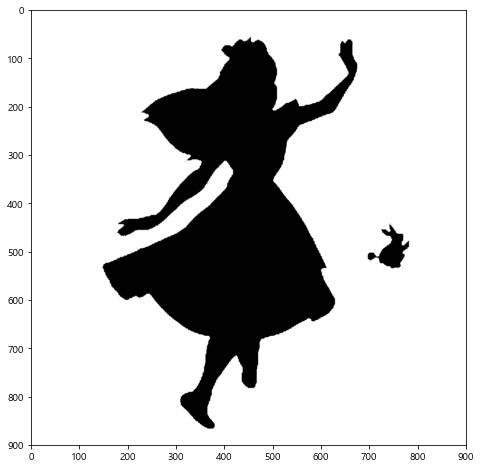

In [17]:
#Bilinear interpolation은 우리 말로 적자면 쌍선형 보간법, 
#또는 이중선형 보간법 정도가 되며 1차원에서의 선형 보간법을 2차원으로 확장한 것이다.

plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
#plt.axis('off')
plt.show()

In [18]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, # 각 단어의 비중값
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

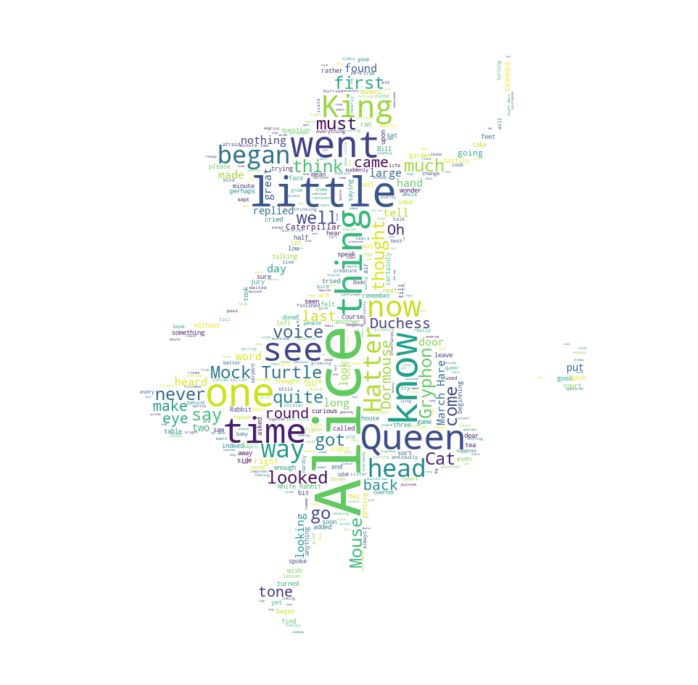

In [19]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
text = open('data/09. a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('data/07. stormtrooper_mask.png'))

In [21]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [22]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [23]:
import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

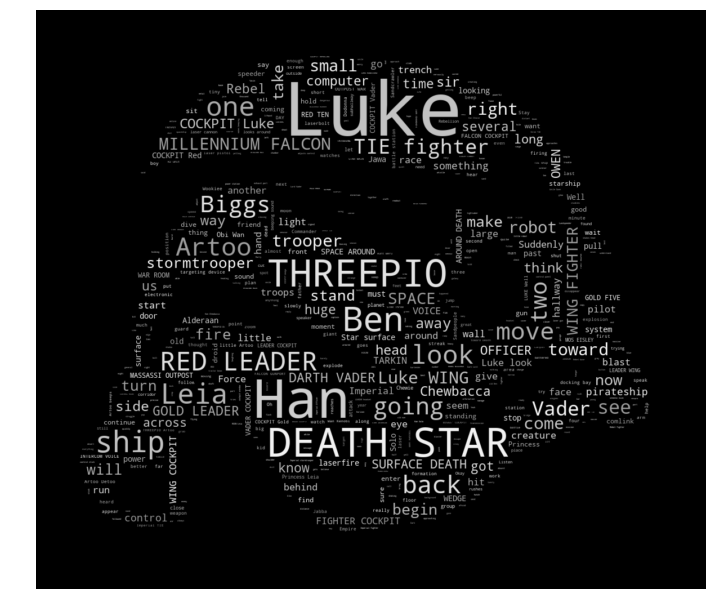

In [24]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

## 8-4. 육아휴직관련 법안 대한민국 국회 제 1809890호 의안

In [25]:
import nltk

In [26]:
nltk.download() # 여유있다면 all / 진행을 위해서는 all-corpora

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [27]:
from konlpy.corpus import kobill # KONLPY에서 제공하는 데이터
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [28]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [29]:
from konlpy.tag import Okt
t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [30]:
ko = nltk.Text(tokens_ko, name="대한민국 국회 의안 제 1809890호") # nltk.Text type으로 묶어주면 여러가지 함수를 사용할 수 있음

In [31]:
print(len(ko.tokens))           # returns number of tokens (document length)
print(len(set(ko.tokens)))   # returns number of unique tokens # set의 중복 제거기능
ko.vocab()                        # returns frequency distribution

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

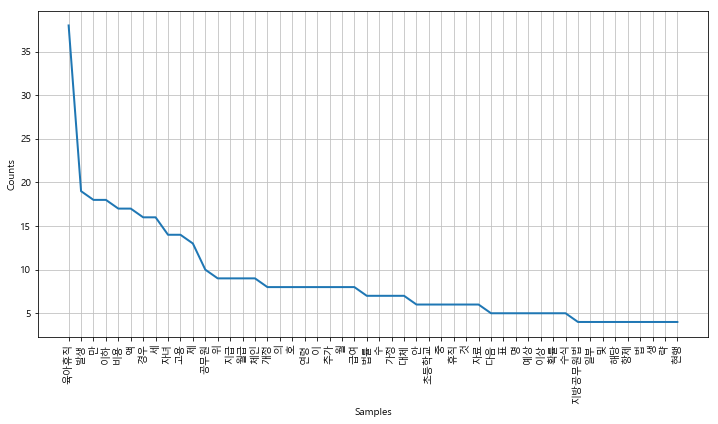

In [32]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [53]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가','를','경우','이하','세']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '취학',
 '중인',
 '초등학교',
 '학년',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현행',
 '초등학교',
 '취',
 '취학',
 '중인',
 '학',
 '전',
 '자녀',
 '양육',
 '위',
 '초등학교',
 '학년',

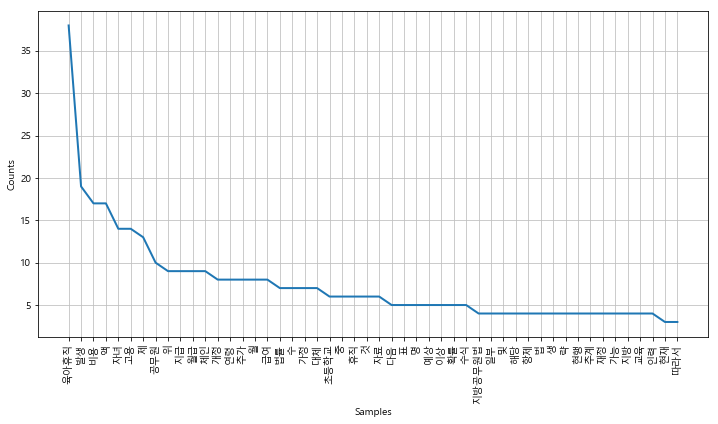

In [54]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)     # Plot sorted frequency of top 50 tokens
plt.show()

In [55]:
ko.count('초등학교')

6

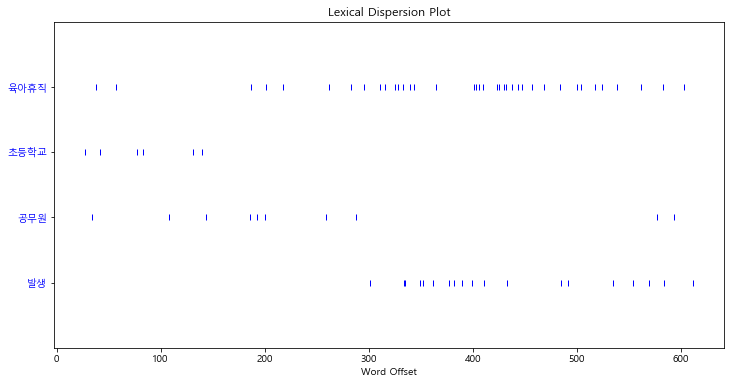

In [56]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원','발생'])

In [57]:
ko.concordance('초등학교') # 주변 문맥을 파악할 수 있도록 보여줌

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아휴직 
사랑 필요 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
공무원법 일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 초등학교 취학 전 자녀 취학 중인 초등학교 학년 말 자녀 부 칙 법 공포 
법 일부 다음 개정 제 항제 중 초등학교 취학 전 자녀 취학 중인 초등학교 학년 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 현 행
 임용 휴직 명 수 다만 제 대통령령 정 사정 직 명 생 략 현행 초등학교 취 취학 중인 학 전 자녀 양육 위 초등학교 학년 여 여자 공무원
 직 명 생 략 현행 초등학교 취 취학 중인 학 전 자녀 양육 위 초등학교 학년 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 현행 


**Collocations : 연어**

https://blog.naver.com/choijung9639/221316311511

In [58]:
ko.collocations()

초등학교 저학년; 고용노동부 육아휴직; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


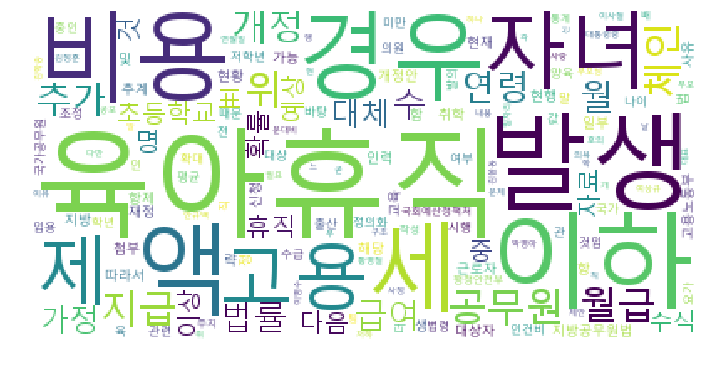

In [39]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 8-5. Naive Bayes Classifier의 이해 - 영문

In [59]:
from nltk.tokenize import word_tokenize
import nltk

In [60]:
train = [('i like you', 'pos'), 
         ('i hate you', 'neg'), 
         ('you like me', 'neg'),
         ('i like her', 'pos')]

In [61]:
all_words = set(word.lower() for sentence in train 
for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [62]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

[({'you': True,
   'i': True,
   'like': True,
   'her': False,
   'me': False,
   'hate': False},
  'pos'),
 ({'you': True,
   'i': True,
   'like': False,
   'her': False,
   'me': False,
   'hate': True},
  'neg'),
 ({'you': True,
   'i': False,
   'like': True,
   'her': False,
   'me': True,
   'hate': False},
  'neg'),
 ({'you': False,
   'i': True,
   'like': True,
   'her': True,
   'me': False,
   'hate': False},
  'pos')]

In [63]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       i = True              pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                    hate = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0


In [64]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower(): 
                                          (word in word_tokenize(test_sentence.lower()))
                                           for word in all_words}
test_sent_features

{'you': False,
 'i': True,
 'like': True,
 'her': False,
 'me': False,
 'hate': False}

In [65]:
classifier.classify(test_sent_features)

'pos'

## 8-6. Naive Bayes Classifier의 이해 - 한글

In [66]:
from konlpy.tag import Twitter

In [67]:
pos_tagger = Okt()

In [68]:
train = [('메리가 좋아', 'pos'), 
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

In [69]:
all_words = set(word.lower() for sentence in train
                        for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [70]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

[({'고양이도': False,
   '수업이': False,
   '마치고': False,
   '메리랑': False,
   '난': False,
   '메리가': True,
   '고양이야': False,
   '이쁜': False,
   '지루해': False,
   '놀거야': False,
   '좋아': True,
   '메리는': False},
  'pos'),
 ({'고양이도': True,
   '수업이': False,
   '마치고': False,
   '메리랑': False,
   '난': False,
   '메리가': False,
   '고양이야': False,
   '이쁜': False,
   '지루해': False,
   '놀거야': False,
   '좋아': True,
   '메리는': False},
  'pos'),
 ({'고양이도': False,
   '수업이': True,
   '마치고': False,
   '메리랑': False,
   '난': True,
   '메리가': False,
   '고양이야': False,
   '이쁜': False,
   '지루해': True,
   '놀거야': False,
   '좋아': False,
   '메리는': False},
  'neg'),
 ({'고양이도': False,
   '수업이': False,
   '마치고': False,
   '메리랑': False,
   '난': False,
   '메리가': False,
   '고양이야': True,
   '이쁜': True,
   '지루해': False,
   '놀거야': False,
   '좋아': False,
   '메리는': True},
  'pos'),
 ({'고양이도': False,
   '수업이': False,
   '마치고': True,
   '메리랑': True,
   '난': True,
   '메리가': False,
   '고양이야': False,
   '이쁜': False,
   '지루해': False,
   '놀거야':

In [71]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0


In [72]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

In [73]:
test_sent_features = {word.lower(): 
                                          (word in word_tokenize(test_sentence.lower()))
                                           for word in all_words}
test_sent_features

{'고양이도': False,
 '수업이': True,
 '마치고': False,
 '메리랑': True,
 '난': True,
 '메리가': False,
 '고양이야': False,
 '이쁜': False,
 '지루해': False,
 '놀거야': True,
 '좋아': False,
 '메리는': False}

In [74]:
classifier.classify(test_sent_features)

'neg'

In [75]:
def tokenize(doc): # 단어/형태소로 토크나이즈
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [76]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [77]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [78]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [79]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

In [80]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [81]:
test_sentence = [("난 수업이 마치면 메리랑 놀거야")]

In [82]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [83]:
classifier.show_most_informative_features()

Most Informative Features
                  난/Noun = True              neg : pos    =      2.5 : 1.0
                 메리/Noun = False             neg : pos    =      2.5 : 1.0
            좋다/Adjective = False             neg : pos    =      1.5 : 1.0
                고양이/Noun = False             neg : pos    =      1.5 : 1.0
                 놀다/Verb = False             neg : pos    =      1.1 : 1.0
           이쁘다/Adjective = False             neg : pos    =      1.1 : 1.0
                  는/Josa = False             neg : pos    =      1.1 : 1.0
                 마치/Noun = False             neg : pos    =      1.1 : 1.0
                  가/Josa = False             neg : pos    =      1.1 : 1.0
                  고/Josa = False             neg : pos    =      1.1 : 1.0


In [84]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

In [85]:
classifier.classify(test_sent_features)

'pos'

## 8-7. 문장의 유사도 측정

### 사이킷런을 이용한 특징 추출

자연어 처리에서 특징 추출이란 텍스트 데이터에서 단어나 문장들을 어떤 특징 값으로 바꿔주는 것을 의미한다. 기존에 문자로 구성돼 있던 데이터를 모델에 적용할 수 있도록 특징을 뽑아 어떤 값으로 바꿔서 수치화한다.

* CountVectorizer : 단순히 각 텍스트에서 횟수를 기준으로 특징을 추출
* TfidfVectorizer : TF-IDF 값을 사용하여 특징 추출
* HashingVectorizer : CountVectorizer와 동일한 방법이지만 텍스트를 처리할 때 해시 함수를 사용하기 때문에 실행 시간을 크게 줄일 수 있다. (텍스트의 크기가 클때 사용)

세 가지 방법 모두 텍스트를 벡터로 만드는 방법이다.

**CountVectorizer**

텍스트 데이터에서 횟수를 기준으로 특징을 추출하는 방법. 여기서 어떤 단위의 횟수를 셀 것인지는 선택 사항이다.

단어 또는 문자 하나하나가 될 수도 있다. 보통은 텍스트에서 단어를 기준으로 횟수를 측정하는데, 문장을 입력으로 받아 단어의 횟수를 측정한 뒤 벡터로 만든다.

객체를 만들고 이 객체에 특정 텍스트를 적합 시켜야한다. (단어 사전)

In [86]:
pip install sklearn


The following command must be run outside of the IPython shell:

    $ pip install sklearn

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [87]:
from sklearn.feature_extraction.text import CountVectorizer

In [88]:
vectorizer = CountVectorizer(min_df = 1)

In [130]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떡하죠?',
                   '메리는 공원에서 산책하고 노는 것을 싫어해요',
            '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
                   '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
                   '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

In [132]:
# vectorize
vectorizer.fit(contents) # 단어 사전 생성 (fit)
print(vectorizer.vocabulary_)

{'메리랑': 10, '놀러가고': 7, '싶지만': 17, '바쁜데': 13, '어떡하죠': 18, '메리는': 9, '공원에서': 3, '산책하고': 14, '노는': 6, '것을': 1, '싫어해요': 15, '것도': 0, '이상해요': 20, '곳으로': 2, '여행을': 19, '떠나고': 8, '싶은데': 16, '너무': 5, '바빠서': 12, '그러질': 4, '못하고': 11, '있어요': 21}


In [133]:
sentense = [contents[0]]
print(vectorizer.transform(sentense).toarray()) # 벡터화 (transform)

[[0.        0.        0.        0.        0.        0.        0.
  0.4472136 0.        0.        0.4472136 0.        0.        0.4472136
  0.        0.        0.        0.4472136 0.4472136 0.        0.
  0.       ]]


In [136]:
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떡하죠',
 '여행을',
 '이상해요',
 '있어요']

In [137]:
X.toarray().transpose() # 4개의 데이터 중 각 columns이 들어가 있는지의 여부

array([[0.        , 0.        , 0.45853232, 0.45853232, 0.        ],
       [0.        , 0.51339094, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.33333333],
       [0.        , 0.3438239 , 0.38062325, 0.38062325, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.33333333],
       [0.        , 0.        , 0.        , 0.        , 0.33333333],
       [0.        , 0.3438239 , 0.38062325, 0.38062325, 0.        ],
       [0.4472136 , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.33333333],
       [0.        , 0.3438239 , 0.38062325, 0.38062325, 0.        ],
       [0.4472136 , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.33333333],
       [0.        , 0.        , 0.        , 0.        , 0.33333333],
       [0.4472136 , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.51339094, 0.

In [138]:
X = vectorizer.fit_transform(contents)
num_samples, num_features = X.shape
num_samples, num_features

(5, 22)

In [139]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_vec = vectorizer.transform(new_post)
new_post_vec.toarray()

array([[0.        , 0.        , 0.        , 0.42799292, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.63907044, 0.        , 0.        , 0.        , 0.63907044,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [140]:
import scipy as sp

def dist_raw(v1, v2): # 두 벡터사이의 유클리드 거리 계산
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [141]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d < best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=1.20   : 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?
== Post 1 with dist=1.02   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=1.29   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.29   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 4 with dist=1.41   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


new_post와 가장 가까운 거리 : post 1

In [142]:
from konlpy.tag import Okt
t = Okt()

In [143]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['메리', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떡하죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해요', '.', '이상해요', '.'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해요', '.', '이상해요', '.'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은데',
  '너무',
  '바빠서',
  '그러질',
  '못',
  '하고',
  '있어요']]

In [144]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize

[' 메리 랑 놀러 가고 싶지만 바쁜데 어떡하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요 .',
 ' 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요']

In [101]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [102]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떡하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [103]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]], dtype=int64)

In [104]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어요']

In [105]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [106]:
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]],
      dtype=int64)

In [107]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [108]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=3.00   : 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?
== Post 1 with dist=1.00   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [109]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [110]:
for i in range(0,len(contents)):
    print(X.getrow(i).toarray())
    
print('---------------------')
print(new_post_vec.toarray())

[[1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
---------------------
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


In [147]:
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    print(v1_normalized)
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

In [148]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

  (0, 10)	0.4472135954999579
  (0, 7)	0.4472135954999579
  (0, 17)	0.4472135954999579
  (0, 13)	0.4472135954999579
  (0, 18)	0.4472135954999579
== Post 0 with dist=1.20   : 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?
  (0, 9)	0.3438238958588713
  (0, 3)	0.3438238958588713
  (0, 14)	0.5133909399988045
  (0, 6)	0.3438238958588713
  (0, 1)	0.5133909399988045
  (0, 15)	0.3438238958588713
== Post 1 with dist=1.02   : 메리는 공원에서 산책하고 노는 것을 싫어해요
  (0, 9)	0.3806232464940797
  (0, 3)	0.3806232464940797
  (0, 6)	0.3806232464940797
  (0, 15)	0.3806232464940797
  (0, 0)	0.45853231996950244
  (0, 20)	0.45853231996950244
== Post 2 with dist=1.29   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
  (0, 9)	0.3806232464940797
  (0, 3)	0.3806232464940797
  (0, 6)	0.3806232464940797
  (0, 15)	0.3806232464940797
  (0, 0)	0.45853231996950244
  (0, 20)	0.45853231996950244
== Post 3 with dist=1.29   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
  (0, 2)	0.3333333333333333
  (0, 19)	0.3333333333333333
  (0, 8)	0.3333333333333333
  (0, 16)	0.3333333333333333
  (0, 5)	0

In [113]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 0.42
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


횟수를 사용해서 벡터를 만들기 때문에 직관적이고 간단해서 여러 상황에서 사용할 수 있다는 장점이 있다.

하지만 단순히 횟수만을 특징으로 잡기 때문에 큰 의미가 없지만 자주 사용되는 단어들, 예를 들면 조사 혹은 지시대명사가 높은 특징 값을 가지기 때문에 유의미하게 사용하기 어려울 수 있다.

이러한 문제점을 해결할 수 있는

**TfidfVectorizer**

TF-IDF라는 특정한 값을 사용해서 텍스트 데이터의 특징을 추출하는 방법이다.

* TF(Term Frequency) : 특정 단어가 하나의 데이터 안에서 등장하는 횟수
* DF(Document Frequency) : 문서 빈도 값으로, 특정 단어가 여러 데이터에 자주 등장하는지를 알려주는 지표 (IDF는 이 값에 역수를 취해서 구할 수 있다. (Inverse))

TF-IDF란 이 두값을 곱해서 사용하므로 어떤 단어가 해당 문서에 자주 등장하지만 다른 문서에는 많이 없는 단어일수록 높은 값을 가지게 된다.

따라서 조사나 지시대명사처럼 자주 등장하는 단어는 TF값은 크지만 IDF값은 작아지므로 CountVectorizer가 가진 문제점을 해결할 수 있다.

In [114]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf, idf

In [115]:
a, abb, abc = ['a'], ['a','b','b'], ['a','b','c']
D = [a,abb,abc]

print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

(1.0, 0.0)
(0.6666666666666666, 0.4054651081081644)
(0.3333333333333333, 0.0)
(0.3333333333333333, 0.4054651081081644)
(0.3333333333333333, 1.0986122886681098)


In [149]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf * idf

In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [151]:
contents_tokens = [t.morphs(row) for row in contents]

contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(5, 20)

In [152]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떡하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [153]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요.']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 근처 공원 에 메리 랑 놀러 가고 싶네요 .']

In [154]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [155]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i
        
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

  (0, 6)	0.24431702680395553
  (0, 4)	0.4336609713621173
  (0, 0)	0.4336609713621173
  (0, 12)	0.4336609713621173
  (0, 8)	0.4336609713621173
  (0, 13)	0.4336609713621173
== Post 0 with dist=0.89   : 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?
  (0, 6)	0.30948279390742617
  (0, 1)	0.3678925296568199
  (0, 14)	0.3678925296568199
  (0, 9)	0.5493297408757738
  (0, 19)	0.4431957760772619
  (0, 10)	0.3678925296568199
== Post 1 with dist=1.22   : 메리는 공원에서 산책하고 노는 것을 싫어해요
  (0, 6)	0.3703694278374568
  (0, 1)	0.4402705041994307
  (0, 14)	0.4402705041994307
  (0, 10)	0.4402705041994307
  (0, 17)	0.5303886653382521
== Post 2 with dist=1.18   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
  (0, 6)	0.3703694278374568
  (0, 1)	0.4402705041994307
  (0, 14)	0.4402705041994307
  (0, 10)	0.4402705041994307
  (0, 17)	0.5303886653382521
== Post 3 with dist=1.18   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
  (0, 19)	0.27430356414954266
  (0, 16)	0.3399921974646731
  (0, 15)	0.3399921974646731
  (0, 5)	0.3399921974646731
  (0, 11)	0.3399921974646731
  (0, 3)

## 8-8. 여자 친구 선물 고르기

In [156]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [157]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

In [158]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    화이트데이 여친선물   마크제이콥스 데이지 러브   남자 선물   끌로에 노마드   끌로에 오드퍼퓸   파니니백   까르벵 시계   30대 여자 선물   30대 남자 선물   디스커버리 버킷디펜더     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  20대중후반 여친선물을 하려고하는데요   2018.11.06.   20대중후반 여친선물을 하려고하는데요 파우더로 하려고해요 그... 솜있는거... 암튼 피부는 굉장히 좋은편이구요 윤기도 있고.. 하얀편이에요 파우더도 바르고요 어떤...   답변 입생로랑 입술바르는거 17.19호 가격대 무난하고 자주쓰는거라 소모가 빨라서 좋아요 고려해보삼 다이아로티하트 목걸이 추천합니다 7만원이고 다이아몬드...      ',
 '  질문  빼빼로데이 여친 선물 추천 어떤게 좋을까요?   2018.10.15.   어떻게 선택을 해야 할지를 모르는데 빼빼로데이 여친선물 추천 부탁드립니다. 처음 여친을 사귀는 거라 어떤것을 해야 할지를 모르겠네요.   답변 빼빼로데이 여친 선물 추천 때문에 질문을 주신거 같으신데요.. 찾아보시면은 빼빼로데이 여친 선물 추천 드리고... 빼빼로데이 다가오면은 여친 선물 하려고 준비를 하는...      ',
 '  질문  여친선물 가방이나 지갑   2018.06.01.   가방이나 지갑봅니다 처음 선물하는거라서 비싼거 주고 싶네요   답변 미국브랜드 보가타 숄더백은 어떠세요~? 제가 선물받아서 잘 쓰고 있는데, 너무 흡족해서 지나가다 추천해드립니다 : ) 친환경브랜드라 가치있는 소비일뿐만아니라 고급...      ',
 '  질문  윤아 선글라스 여친 선

In [159]:
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))

    soup = BeautifulSoup(response, "html.parser")

    tmp = soup.find_all('dl')

    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

In [160]:
present_candi_text

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    여자친구 생일선물   여자 근력운동   여자친구 100일 선물   10대 여자친구 선물   와일드망고   친구 선물   여자친구 목걸이   스킨케어   여자 30대 선물   20대 여자친구 선물     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  여자친구선물 기억에남을만한것   2019.02.25.   여자친구선물 고민중입니다 금액은 20만원 내외면 좋을거같고 나이는 20대후반입니다 여자친구선물 명품지갑이나... 특별하고 기억에 남을만한 여자친구선물 추천해주세요   답변 여자친구선물 기억에 남는걸로 말씀드리자면 저는... 마음에 여자친구선물 녹음기를 줬었는데 결론적으로... 주는 여자친구선물 으로는 녹음기도 괜찮은거 같습니다 대신...      ',
 '  질문  여자친구선물 알려주세요   2019.01.04.   간단한 여자친구선물 고르는 중인데 개인적으론... 근데 제가 여자 화장품을 너무 몰라서요 여자친구선물로 줄... 부탁드리구요;; 여자친구선물하기좋은 순한화장품 있을까요?   답변 여자친구선물로 고민이 많이되실거같아요! 음 보통 여자친구선물로 가방,향수,화장품 요정도를 많이 하는거... 그럼 여자친구선물 답변 마치도록 하겠습니다 화장품으로...      ',
 '  질문  여자친구 선물 찾는 중인데 추천 좀   2019.02.27.   뜬금없지만 여자친구 선물을 준비하려고 합니다 제가 말주변이 없어서 좀 무뚝뚝보이지만 이번에 여자친구 선물 주면서 그동안 제대로 전하지 못했던 마음도 표현해보려...   답변 몰래 준비하는 여자친구 선물이라니 제가 다 부럽네요~ 렌즈를 자주 착용하는 여자친구 선물이라면 

In [161]:
len(present_candi_text)

1300

In [162]:
import nltk
from konlpy.tag import Twitter; t = Twitter()

In [ ]:
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

In [ ]:
tokens_ko = t.morphs(present_text)
tokens_ko

In [ ]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

In [ ]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(100)

In [ ]:
ko.similar('여자친구')

In [ ]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko 
                                                         if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

In [ ]:
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [ ]:
data = ko.vocab().most_common(300)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
mask = np.array(Image.open('../data/09. heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [ ]:
data = ko.vocab().most_common(200)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

* gensim install : **pip install gensim**

In [ ]:
import gensim
from gensim.models import word2vec

In [ ]:
twitter = Twitter()
results = []
lines = present_candi_text

for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r= []
    
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
            
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)

In [ ]:
data_file = 'pres_girl.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))

In [ ]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, 
                                                                        min_count=2, sg=1)
model.save('pres_girl.model')

In [ ]:
model = word2vec.Word2Vec.load("pres_girl.model")

In [ ]:
model.most_similar(positive=['선물'])

In [ ]:
model.most_similar(positive=['여자친구'])